#  <span style="color:Green">*Viewership Span Of A Movie*</span> 


In [208]:
#Import all libraries that could be useful.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import seaborn

#### *Open all required files of used data set and check their dimensions*

In [209]:
movies=pd.read_csv(r"movies.csv")
ratings=pd.read_csv(r"ratings.csv")

#### *Take a look of summary of our data*

In [210]:
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [211]:
movies.tail()

,movieId,title,genres
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama


In [212]:
movies.shape

(62423, 3)

In [213]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [214]:
ratings.tail()

,userId,movieId,rating,timestamp
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434
25000094,162541,63876,5.0,1240952515


In [215]:
ratings.shape

(25000095, 4)

In a picture of above data sets of ratings and movies we can see that we have 25,000,095 number of ratings for 62,423 number of movies.

#### *Check for the null columns in the data and remove them if present*

In [216]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [217]:
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

There is no any empty cell in our data, so we can proceed further.

#### *Our target is to select the top 10 most rated movies.* 
We will find total number of ratings for each movie but before approaching for total number of ratings for each movie we must check the summary statistics of ratings if there is any outlier in the data.

In [218]:
ratings["rating"].describe()

count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

Minimum rating is 0.5 and maximum rating is 5 whic show there is scale of ten rating points with a difference of 0.5. Average rating is around 3.5

Now we can calculate total number of ratings for each movie

In [219]:
rat_count=ratings[["rating","movieId"]].groupby("movieId", as_index=False).count()
rat_count

,movieId,rating
0,1,57309
1,2,24228
2,3,11804
3,4,2523
4,5,11714
...,...,...
59042,209157,1
59043,209159,1
59044,209163,1
59045,209169,1


In [220]:
rat_count.shape, movies.shape

((59047, 2), (62423, 3))

In [221]:
x=movies.shape[0]-rat_count.shape[0]
print(x)

3376


Here we can see that 62,423 rows are present in movies data while, on grouping ratings data as per movies id shows total 59,047 rows which means that ratings for remaining 3,376 movies are not available. 

In [222]:
rat_count=rat_count.sort_values(by="rating", ascending=True)

In [223]:
rat_count.head(10)

,movieId,rating
29523,136782,1
34959,151011,1
34958,151001,1
34951,150962,1
34947,150950,1
34946,150941,1
34944,150933,1
34941,150918,1
34960,151021,1
34939,150914,1


In [224]:
rat_count.tail(10)

,movieId,rating
2867,2959,58773
108,110,59184
522,527,60411
475,480,64144
257,260,68717
2480,2571,72674
585,593,74127
292,296,79672
314,318,81482
351,356,81491


Above the top ten most raated movies have been found. Now we have to cross check either we found correct movies that are most number of times rated or not. In order to check we will take movieId "2959 & 356".

In [225]:
c=ratings["movieId"]==2959
ratings[c]

,userId,movieId,rating,timestamp
322,3,2959,5.0,1439474417
2147,12,2959,3.0,1167743122
2566,13,2959,5.0,1237970896
2872,14,2959,5.0,1506208887
2974,16,2959,5.0,1432081057
...,...,...,...,...
24999001,162534,2959,5.0,1526666232
24999451,162536,2959,3.5,1572257732
24999587,162537,2959,5.0,1047171599
24999683,162538,2959,2.5,1438781100


In [226]:
c=ratings["movieId"]==356
ratings[c]

,userId,movieId,rating,timestamp
82,2,356,4.5,1141416637
266,3,356,4.0,1439472199
1193,5,356,4.0,833146744
1350,8,356,5.0,890489591
1482,9,356,5.0,859383448
...,...,...,...,...
24998553,162533,356,4.5,1281405928
24998908,162534,356,2.5,1526713038
24999530,162537,356,5.0,1047170962
24999634,162538,356,4.0,1438780751


Number of ratings for the movies we found seems correct after validation.

#### *We will save these most rated movies into a new data frame and then merge this data frame with the movies data to find out the names of these movies and ratings for every year.*

In [227]:
ten=rat_count.tail(10)

In [228]:
topten=ten.merge(movies,on="movieId",how="inner")
topten

,movieId,rating,title,genres
0,2959,58773,Fight Club (1999),Action|Crime|Drama|Thriller
1,110,59184,Braveheart (1995),Action|Drama|War
2,527,60411,Schindler's List (1993),Drama|War
3,480,64144,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
4,260,68717,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
5,2571,72674,"Matrix, The (1999)",Action|Sci-Fi|Thriller
6,593,74127,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7,296,79672,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
8,318,81482,"Shawshank Redemption, The (1994)",Crime|Drama
9,356,81491,Forrest Gump (1994),Comedy|Drama|Romance|War


In [229]:
tenId=topten["movieId"].tolist()
tenId

[2959, 110, 527, 480, 260, 2571, 593, 296, 318, 356]

In [230]:
ten_movies=ratings["movieId"].isin(tenId)
ten_movies=ratings[ten_movies]
ten_movies

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
72,2,110,5.0,1141416589
76,2,260,5.0,1141417172
79,2,318,5.0,1141417181
82,2,356,4.5,1141416637
...,...,...,...,...
24999927,162541,318,4.0,1240952695
24999934,162541,527,4.5,1240953464
24999938,162541,593,4.0,1240953576
25000008,162541,2571,5.0,1240953087


In [231]:
most_rated=movies.merge(ten_movies,on="movieId",how="inner")

In [232]:
most_rated

,movieId,title,genres,userId,rating,timestamp
0,110,Braveheart (1995),Action|Drama|War,2,5.0,1141416589
1,110,Braveheart (1995),Action|Drama|War,8,5.0,890489328
2,110,Braveheart (1995),Action|Drama|War,10,4.0,1227571327
3,110,Braveheart (1995),Action|Drama|War,13,4.5,1278832175
4,110,Braveheart (1995),Action|Drama|War,15,3.0,946011409
...,...,...,...,...,...,...
700670,2959,Fight Club (1999),Action|Crime|Drama|Thriller,162534,5.0,1526666232
700671,2959,Fight Club (1999),Action|Crime|Drama|Thriller,162536,3.5,1572257732
700672,2959,Fight Club (1999),Action|Crime|Drama|Thriller,162537,5.0,1047171599
700673,2959,Fight Club (1999),Action|Crime|Drama|Thriller,162538,2.5,1438781100


In [233]:
most_rated.isnull().any()

movieId      False
title        False
genres       False
userId       False
rating       False
timestamp    False
dtype: bool

We have separated all the most rated movies in a separate data frame. 

#### *Now we will convert timestamp column into standard readable time format to find the actual time of ratings. After that we will delete all the unnecessary columns from our data and further we will separate movie year also to observe how long after its releasing year a movie is getting ratings.*

In [234]:
most_rated["rating time"]=pd.to_datetime(most_rated["timestamp"], unit="s")
most_rated

,movieId,title,genres,userId,rating,timestamp,rating time
0,110,Braveheart (1995),Action|Drama|War,2,5.0,1141416589,2006-03-03 20:09:49
1,110,Braveheart (1995),Action|Drama|War,8,5.0,890489328,1998-03-21 14:08:48
2,110,Braveheart (1995),Action|Drama|War,10,4.0,1227571327,2008-11-25 00:02:07
3,110,Braveheart (1995),Action|Drama|War,13,4.5,1278832175,2010-07-11 07:09:35
4,110,Braveheart (1995),Action|Drama|War,15,3.0,946011409,1999-12-24 04:56:49
...,...,...,...,...,...,...,...
700670,2959,Fight Club (1999),Action|Crime|Drama|Thriller,162534,5.0,1526666232,2018-05-18 17:57:12
700671,2959,Fight Club (1999),Action|Crime|Drama|Thriller,162536,3.5,1572257732,2019-10-28 10:15:32
700672,2959,Fight Club (1999),Action|Crime|Drama|Thriller,162537,5.0,1047171599,2003-03-09 00:59:59
700673,2959,Fight Club (1999),Action|Crime|Drama|Thriller,162538,2.5,1438781100,2015-08-05 13:25:00


In [235]:
del most_rated["userId"]
del most_rated["timestamp"]

In [236]:
most_rated.head()

,movieId,title,genres,rating,rating time
0,110,Braveheart (1995),Action|Drama|War,5.0,2006-03-03 20:09:49
1,110,Braveheart (1995),Action|Drama|War,5.0,1998-03-21 14:08:48
2,110,Braveheart (1995),Action|Drama|War,4.0,2008-11-25 00:02:07
3,110,Braveheart (1995),Action|Drama|War,4.5,2010-07-11 07:09:35
4,110,Braveheart (1995),Action|Drama|War,3.0,1999-12-24 04:56:49


In [237]:
most_rated.tail()

,movieId,title,genres,rating,rating time
700670,2959,Fight Club (1999),Action|Crime|Drama|Thriller,5.0,2018-05-18 17:57:12
700671,2959,Fight Club (1999),Action|Crime|Drama|Thriller,3.5,2019-10-28 10:15:32
700672,2959,Fight Club (1999),Action|Crime|Drama|Thriller,5.0,2003-03-09 00:59:59
700673,2959,Fight Club (1999),Action|Crime|Drama|Thriller,2.5,2015-08-05 13:25:00
700674,2959,Fight Club (1999),Action|Crime|Drama|Thriller,5.0,2009-04-28 21:18:08


In [238]:
most_rated.shape

(700675, 5)

In [239]:
most_rated["rating year"]=pd.DatetimeIndex(most_rated["rating time"]).year
most_rated.head(3)

,movieId,title,genres,rating,rating time,rating year
0,110,Braveheart (1995),Action|Drama|War,5.0,2006-03-03 20:09:49,2006
1,110,Braveheart (1995),Action|Drama|War,5.0,1998-03-21 14:08:48,1998
2,110,Braveheart (1995),Action|Drama|War,4.0,2008-11-25 00:02:07,2008


In [240]:
most_rated["movie year"]=most_rated["title"].str.extract(".*\((.*)\).*",expand=True)
most_rated.head(3)

,movieId,title,genres,rating,rating time,rating year,movie year
0,110,Braveheart (1995),Action|Drama|War,5.0,2006-03-03 20:09:49,2006,1995
1,110,Braveheart (1995),Action|Drama|War,5.0,1998-03-21 14:08:48,1998,1995
2,110,Braveheart (1995),Action|Drama|War,4.0,2008-11-25 00:02:07,2008,1995


In [241]:
rating_time=most_rated.pop("rating time")

#### *Here we have taken all the most number of times rated movies. Below we will continue to draw their graphs to see the trends of ratings.*

In [242]:
movie_name=most_rated["title"].unique().tolist()
movie_name

['Braveheart (1995)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Pulp Fiction (1994)',
 'Shawshank Redemption, The (1994)',
 'Forrest Gump (1994)',
 'Jurassic Park (1993)',
 "Schindler's List (1993)",
 'Silence of the Lambs, The (1991)',
 'Matrix, The (1999)',
 'Fight Club (1999)']

In [243]:
Years=most_rated["rating year"].unique().tolist()

In [244]:
Years.sort()
print(Years)

[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [245]:
for i in range(len(movie_name)):
    plot=most_rated["title"]==movie_name[i]
    line=most_rated[plot]
    graph=line[["title", "rating year"]].groupby("rating year").count()
    graph.rename(columns={"title":movie_name[i]},inplace=True)
    if i>0:
        result=pd.concat([result,graph],axis=1,join="outer")
    else:
        result=graph 


In [247]:
result=result.fillna(0)

In [248]:
result.head()

,Braveheart (1995),Star Wars: Episode IV - A New Hope (1977),Pulp Fiction (1994),"Shawshank Redemption, The (1994)",Forrest Gump (1994),Jurassic Park (1993),Schindler's List (1993),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Fight Club (1999)
rating year,,,,,,,,,,
1996,12314,2099,16494,13218,15264,14957,8994,14168,0.0,0.0
1997,1617,6917,1874,1590,1816,1684,1636,1978,0.0,0.0
1998,913,1126,995,789,1051,903,859,1042,0.0,0.0
1999,2822,3779,3587,2958,3172,2619,3250,3665,3495.0,934.0
2000,4153,5233,3843,3990,3827,4672,4123,4629,4549.0,2220.0


In [249]:
result.dtypes

Braveheart (1995)                              int64
Star Wars: Episode IV - A New Hope (1977)      int64
Pulp Fiction (1994)                            int64
Shawshank Redemption, The (1994)               int64
Forrest Gump (1994)                            int64
Jurassic Park (1993)                           int64
Schindler's List (1993)                        int64
Silence of the Lambs, The (1991)               int64
Matrix, The (1999)                           float64
Fight Club (1999)                            float64
dtype: object

In [250]:
result["Fight Club (1999)"]=result["Fight Club (1999)"].astype(int)
result["Matrix, The (1999)"]=result["Matrix, The (1999)"].astype(int)

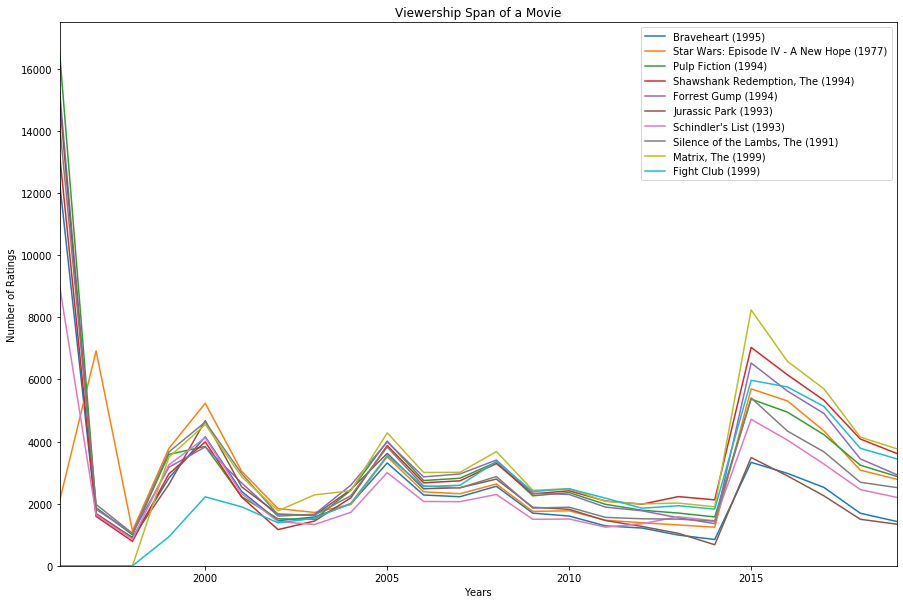

In [257]:
fig, ax = plt.subplots(figsize=(15,10))
for i in range(10):
    plt.plot(result.iloc[:,i],label=movie_name[i])

plt.title("Viewership Span of a Movie")
plt.xlabel("Years")
plt.ylabel("Number of Ratings")
plt.xlim(result.index.min(), result.index.max())
plt.ylim(0,17500)
plt.legend()
plt.show()

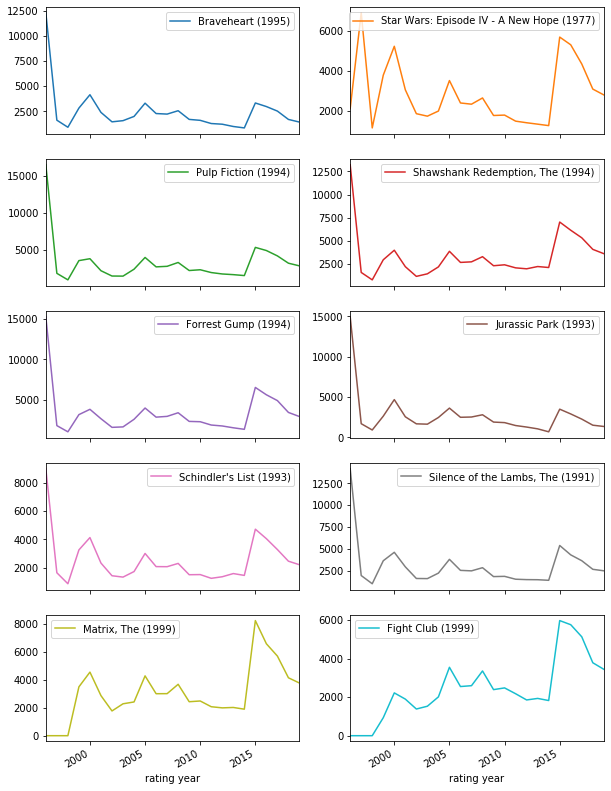

In [255]:
result.plot(subplots=True,figsize=(10,15),layout=(5,2));